#### BANKING: DIRECT MARKETING CASE STUDY (CAMPAIGN RESPONSE MODEL) - CLASSIFICATION MODEL

**OBJECTIVE:** This example uses data related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed ('yes') or not ('no').

##### Bank client data:
- age (numeric)
- job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric) --> termed deposit rate
- nr.employed: number of employees - quarterly indicator (numeric)


##### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

https://www2.1010data.com/documentationcenter/prod/Tutorials/MachineLearningExamples/BankMarketingDataSet.html


### NOTES ABOUT RESPONSE MODELS:
#### Targeting the Right Prospects: What are Response Models?

Response models use data mining to find similarities between responders from previous marketing campaigns to predict who is likely or not likely to respond to a future campaign. The model is then scored against the prospects of the new campaign and a marketer can choose to mail only those people that are most likely to purchase. This increases conversions and decreases costs by only mailing to those most likely to respond.

- Direct Marketing Models: Good, Better, Best

Not all models are created equal. Here’s a quick summary of different types of direct marketing models:

#### GOOD. Recency, Frequency, Monetary (RFM) models:

- simple, better than not modeling

- Though very basic, many marketers still rely on RFM models. Technically RFM models aren’t actually response models since they are descriptive but not truly predictive. This method emphasizes customer behavior and segments by how recently a customer purchased, how often they purchase, and how much they spend.

- RFM can identify good customers and provide a lift in response rates versus not using any targeting. Another benefit is that it is both simple and descriptive, so it is easily understood by business people.

- Unfortunately, RFM doesn’t take into account life stage and assumes that customers are likely to continue to respond the same way. If RFM is the only targeting method, the most attractive segments are likely to be over-marketed to at the expense of other segments that could be invested in.

#### BETTER. Traditional Response or Regression Models: 
- more sophisticated and predictive than RFM

- Regression models determine the correlation between variables. Unlike RFM models, regression takes into account that scores can quickly change when combined with other variables. 

- The model is developed specifically to predict a desired behavior, such as response. Response models require both responder and non-responder data to identify patterns of those likely to respond to a marketing campaign.

- This is by far the most widely used approach for marketers and has been a mainstay of predictive analytics for decades.

#### BEST. Multi-Channel Customer Level Response Models: 
- A New Approach that Outperforms Traditional

- This innovative approach identifies not only those prospects most likely to purchase, but also which marketing channel they are most likely to respond to. This allows marketers to optimize their marketing budgets most effectively by contacting the prospect in the channel(s) they prefer and are most likely to be moved by.

- Multi-Channel Customer Level Response Models are different from traditional response models in that all of a prospect’s known activity is taken into account – email opens, web browsing, display ad click-throughs, mobile, purchase behavior – and not just direct mail behavior. With a more holistic view of the customer, a marketer can create the ideal customer contact strategy for each customer.

- In a recent head-to-head in the mail test with a major cataloger, the Multi-Channel Customer Level Response Model outperformed the traditional response model with a more than +14% lift in response rate. This increase translates into millions of dollars in new annual revenue at the current spend. A new subject line or pretty picture won’t drive revenue like that!

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
## Load the data
data=pd.read_csv('C:/Users/shree/Desktop/Data_Science_Assignments/Stats_ML/class 15 - KNN and NB/bank-additional.csv', sep=";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 498.8+ KB


In [4]:
#Labelling y column to 1,0 values which is orginally stored as yes,no
#str.lower bcoz "y" can be NO, No,no,YES,yes or Yes
data['y'] = data['y'].str.lower().replace({'yes': 1, 'no': 0})

In [5]:
data.head().T

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [6]:
data.describe().T #only for continuous variables which are 10 out of 21

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
#pandas_profiling.ProfileReport(data)

In [8]:
# Checking the missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

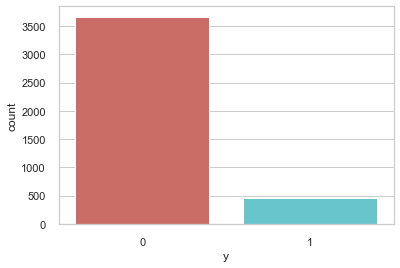

In [9]:
#dependent variable distribution (response vs. non response)
#palette='hls'-->lets you control the lightness and saturation of the colors.
sns.countplot(x='y',data=data, palette='hls')
plt.show() # so, here we can see its imbalanced data as 0's are more in comparsion to 1's in dependent variable(Y)

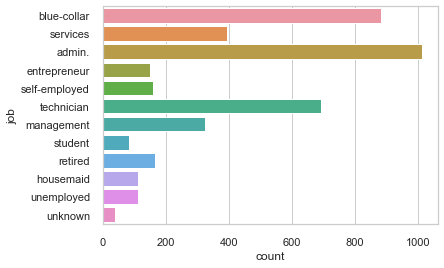

In [10]:
#Customer Job Distribution
#dountplot is for freq counting used for catagorical variables.
sns.countplot(y="job", data=data)
plt.show()

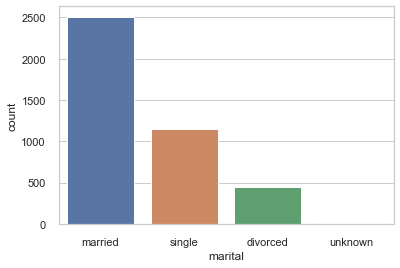

In [11]:
#Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

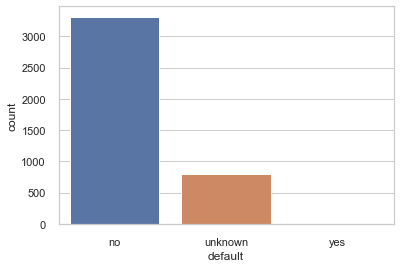

In [12]:
# Distribution of Default
sns.countplot(x="default", data=data)
plt.show()

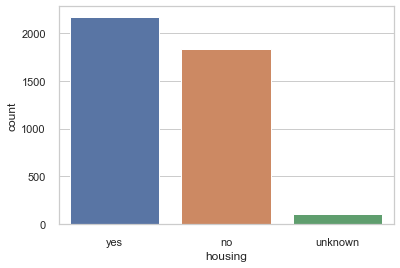

In [13]:
#house loan Distribution
sns.countplot(x="housing", data=data)
plt.show()

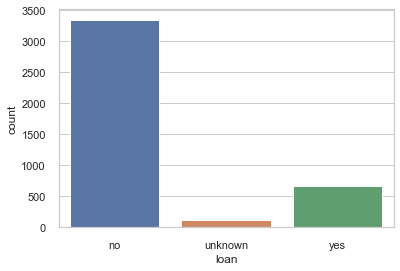

In [14]:
#personal Loan
sns.countplot(x="loan", data=data)
plt.show()

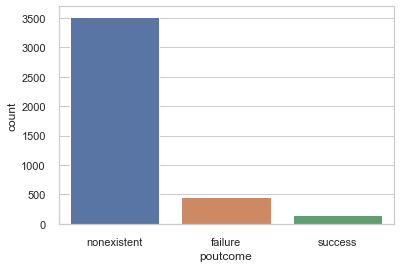

In [15]:
# Previous Marketing campaign response
sns.countplot(x="poutcome", data=data)
plt.show()

In [16]:
data.groupby('y').mean() #for continuous variavbles

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


##### Observations:
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [17]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885,0.131423
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611,0.069005
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000,0.054054
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727,0.100000
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914,0.092593
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048,0.228916
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843,0.081761
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870,0.089059
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341,0.231707


In [18]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964,0.096413
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472,0.100438
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114,0.134432
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091,0.090909


In [19]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic.4y,47.657343,255.682984,2.421911,973.524476,0.142191,0.291841,93.666193,-40.465501,3.828089,5174.093939,0.088578
basic.6y,40.144737,259.000000,2.649123,985.881579,0.140351,0.271053,93.689114,-41.539912,3.810469,5176.600000,0.074561
basic.9y,39.231707,250.538328,2.348432,979.963415,0.158537,0.183275,93.640805,-41.443554,3.722737,5173.182578,0.074913
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frequency of Purchase')

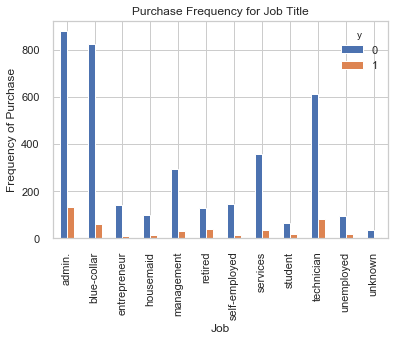

In [20]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

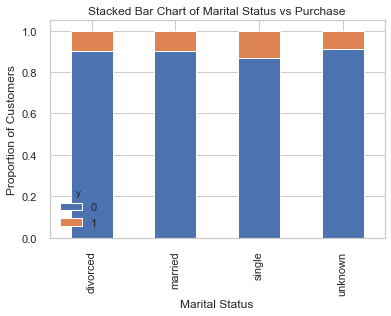

In [21]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
#plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

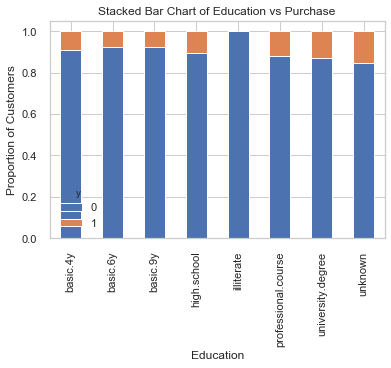

In [22]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

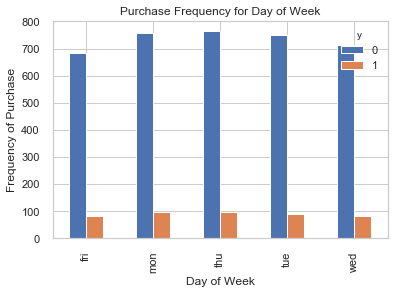

In [23]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome.

Text(0, 0.5, 'Frequency of Purchase')

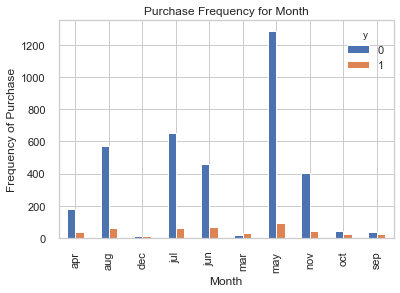

In [24]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

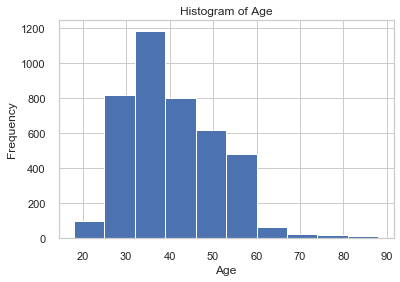

In [25]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

Text(0, 0.5, 'Frequency of Purchase')

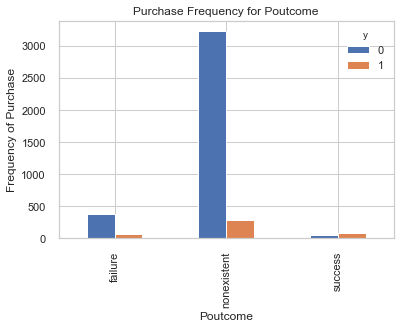

In [26]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

In [27]:
#Create dummy variables: That is variables with only two values, zero and one.

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [28]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [29]:
data_final_vars=data_final.columns.values.tolist() # X and Y are getting defined here..that which variable is X and which is Y.
y=['y']
X=[i for i in data_final_vars if i not in y]

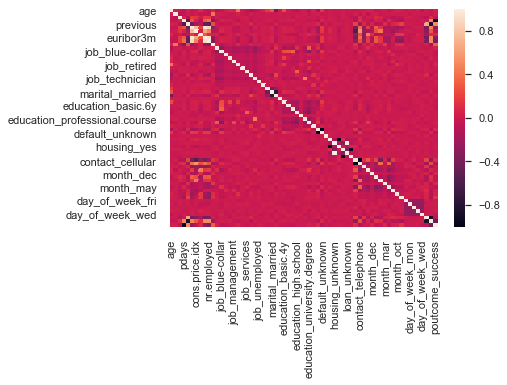

In [30]:
#Check the independence between the independent variables
sns.heatmap(data_final.corr())
plt.show()

##### Feature Selection
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [31]:
data_final.shape

(4119, 64)

In [32]:
#Under sklearn.feature_selection we have RFE and under RFE we have logistic,RF,etc techniques.
#So, here we are using logistic regression

from sklearn import datasets

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20) # we have assumed that we only want top 20 variables.We dont know whether 15,20,25,etc which is better
                      # rfe will internally create multiple models by taking diff 20 random vars each time.
rfe = rfe.fit(data_final[X], data_final[y])

print(rfe.support_) # gives output in the form of array of true and false, means var is there in top 20 or not
print(rfe.ranking_) # giving rank to each of the 63 X variable

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[False False False False  True False False False  True False  True  True
  True False  True  True  True False False  True  True False False False
 False False False False False False False False False  True False False
 False  True False False False False False False  True False False  True
  True  True  True  True False False False False False False False False
  True False  True]
[33 32 12 41  1 13 19 17  1 27  1  1  1 35  1  1  1 18 39  1  1 37 10 20
 23 43  8 34  7  6 42 16 25  1 22 21 44  1  9 40  5 14 26  3  1 31 15  1
  1  1  1  1  4 36 38 28 30 24 29  2  1 11  1]


The RFE has helped us select the following features: “previous”, “euribor3m”, “job_blue-collar”, “job_retired”, “job_services”, “job_student”, “default_no”, “month_aug”, “month_dec”, “month_jul”, “month_nov”, “month_oct”, “month_sep”, “day_of_week_fri”, “day_of_week_wed”, “poutcome_failure”, “poutcome_nonexistent”, “poutcome_success”.

In [33]:
#We will now take only top 20 vars.

cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
   "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
     "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

### Implementing the model

In [34]:
#StandardScaler is used to standardise the selected 20 vars, it is internally calculating z-score
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_scaled=pd.DataFrame(sc.fit_transform(X))

X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.351356,-1.331707,1.912983,-0.204923,-0.324769,-0.142521,0.492477,-0.427319,-0.073279,-0.456757,-0.348463,-0.130526,-0.12563,2.088847,-0.489050,-0.351958,0.411308,-0.188958
1,-0.351356,0.711698,-0.522744,-0.204923,3.079110,-0.142521,0.492477,-0.427319,-0.073279,-0.456757,-0.348463,-0.130526,-0.12563,2.088847,-0.489050,-0.351958,0.411308,-0.188958
2,-0.351356,0.773427,-0.522744,-0.204923,3.079110,-0.142521,0.492477,-0.427319,-0.073279,-0.456757,-0.348463,-0.130526,-0.12563,-0.478733,2.044782,-0.351958,0.411308,-0.188958
3,-0.351356,0.771697,-0.522744,-0.204923,3.079110,-0.142521,0.492477,-0.427319,-0.073279,-0.456757,-0.348463,-0.130526,-0.12563,2.088847,-0.489050,-0.351958,0.411308,-0.188958
4,-0.351356,0.328632,-0.522744,-0.204923,-0.324769,-0.142521,0.492477,-0.427319,-0.073279,-0.456757,2.869743,-0.130526,-0.12563,-0.478733,-0.489050,-0.351958,0.411308,-0.188958


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

we can first standardise all the variables and then can select 20/15/25/etc variables...this all depend on us.
same for spliting data in training n testing...this also depends on you when you want to do this

## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

KNeighborsClassifier(n_neighbors=5, weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None,
n_jobs=None,**kwargs)

In [37]:
#here, n_neighbors is the K value
#By default, in each modelling we did earlier scoring was done on basis of accuracy, but we know accuracy
#can be misleading specially incase of imbalanced data; hence we have chosen scoring='roc_auc' this time.
#roc_auc<60% is useless
#what type of scoring you are selceting also has a great impact on accuracy, auc and n_neighbors

tuned_parameters = [{'n_neighbors': [3,5,7,9,11,13]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                scoring='roc_auc',
                      n_jobs=-1)

In [38]:
# above model has done CV using roc_auc score, but best_score_ parameter will always fetch model accuracy

knn_clf.fit(X_train, y_train )

knn_clf.best_score_ #output = model accuracy, this accuracy would be 0.89 if we would not have mentioned scoring='roc_auc'

0.7287295952324155

In [39]:
knn_clf.predict( X_train )

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
metrics.roc_auc_score( y_train, knn_clf.predict( X_train )) #roc_auc score > 60% model is good

0.6448815018101411

In [41]:
knn_clf.best_params_

{'n_neighbors': 7}

In [42]:
#Building for the n_neighbors=7
knn_clf = KNeighborsClassifier( n_neighbors =7 )

In [43]:
knn_clf.fit( X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [44]:
#CM on test data
knn_cm = metrics.confusion_matrix( y_test, knn_clf.predict( X_test ) )

Text(0.5, 9.0, 'Predicted label')

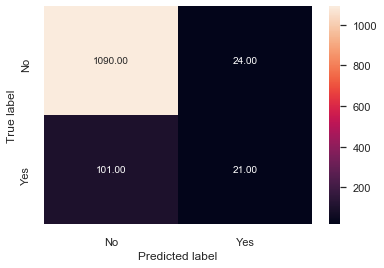

In [45]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [46]:
#Compute precision, recall, F-measure and support on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_clf.predict( X_test )))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1114
           1       0.47      0.17      0.25       122

    accuracy                           0.90      1236
   macro avg       0.69      0.58      0.60      1236
weighted avg       0.87      0.90      0.88      1236



In [47]:
accuracy=metrics.accuracy_score( y_test, knn_clf.predict( X_test ) )
AUC=metrics.roc_auc_score( y_test, knn_clf.predict( X_test ))

print("KNN model accuracy: %.3f" % (accuracy))
print("KNN model AUC: %.3f" % (AUC)) #here aur<60% though accu~90%,
                                     #this is bcoz of imbalance data, we have to take care of this in next step

KNN model accuracy: 0.899
KNN model AUC: 0.575


Interpretation: We can see from  poor precion and recall for '1's in classification report and AUC that model performacne is not upto the mark. High accuracy score is misleading because of skewed data.

We will now rebuild the model after re-balancing the data

#### We will now rebuild the model after re-balancing the data. 
Oversampling & Undersampling for imbalance data

In [48]:
#!pip install imblearn
import imblearn
dir(imblearn)

['FunctionSampler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'combine',
 'ensemble',
 'exceptions',
 'keras',
 'metrics',
 'over_sampling',
 'pipeline',
 'show_versions',
 'tensorflow',
 'under_sampling',
 'utils']

In [49]:
#-----------------------------------#Random Undersampling------------------------------

from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter # it is same like value_counts()

rus = RandomUnderSampler(random_state=500)

X_under_train, y_under_train = rus.fit_sample(X_train, y_train)#resampling is done only on train and not on test
                                                                #test data is still unbalanced

print('Original dataset shape {}'.format(Counter(y_train)))
print('Undersampled dataset shape {}'.format(Counter(y_under_train)))

#-----------------------------------#Random Oversampling------------------------------

#in oversampling that 329 is repeated again to make it 2554, this is bootstrapping

from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler(random_state=500)
X_over_train, y_over_train = ros.fit_sample(X_train, y_train)
print('Oversampled dataset shape {}'.format(Counter(y_over_train)))

# for your Reference only :

#----------------------#Synthetic Minority Oversampling TEchnique---------------------- 
   

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=500)
X_smote_train, y_smote_train = smote.fit_sample(X_train, y_train)
print('SMOTE dataset shape {}'.format(Counter(y_smote_train)))

#------------- Under-over using Synthetic Minority Oversampling TEchnique Tomek----------
#Optional

from imblearn.combine import SMOTETomek   

und_ovr = SMOTETomek(random_state=500)
X_und_ovr_train, y_und_ovr_train = und_ovr.fit_sample(X_train, y_train)
print('Under-Ovr SMOTETomek dataset shape {}'.format(Counter(y_und_ovr_train)))

Original dataset shape Counter({0: 2554, 1: 329})
Undersampled dataset shape Counter({0: 329, 1: 329})
Oversampled dataset shape Counter({0: 2554, 1: 2554})
SMOTE dataset shape Counter({0: 2554, 1: 2554})
Under-Ovr SMOTETomek dataset shape Counter({0: 2519, 1: 2519})


In [50]:
import imblearn.combine
dir(imblearn.combine)

['SMOTEENN',
 'SMOTETomek',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_smote_enn',
 '_smote_tomek']

In [51]:
tuned_parameters = [{'n_neighbors': [3,5,7,9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='roc_auc')

In [52]:
#Refitting the model on oversampled data
knn_clf.fit(X_over_train, y_over_train)
knn_clf.best_params_

{'n_neighbors': 7}

In [53]:
knn_clf = KNeighborsClassifier( n_neighbors =7)

In [54]:
#Refitting the model on oversampled data
knn_clf.fit(X_over_train, y_over_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [55]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_clf.predict( X_test )))
#recall parameter is very important

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1114
           1       0.26      0.42      0.32       122

    accuracy                           0.83      1236
   macro avg       0.60      0.64      0.61      1236
weighted avg       0.87      0.83      0.84      1236



In [56]:
accuracy=metrics.accuracy_score( y_test, knn_clf.predict( X_test ) )
AUC=metrics.roc_auc_score( y_test, knn_clf.predict( X_test ))

print("KNN model accuracy: %.3f" % (accuracy))
print("KNN model AUC: %.3f" % (AUC)) #now auc>60%, this is for oversampled data and not undersampled data
#you can chk auc and accuracy for undersampled also.

KNN model accuracy: 0.827
KNN model AUC: 0.645


The increment of 8 pts in  AUC is quite evidednt of the fact how re-balancing data can improve the model performance. This concept is applicable for all type of classification models and must be considered if the provided data is imbalanced. 

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# GaussianNB	When independent variables are continous
# BernoulliNB	When data consists of binary categorical independent vars
# MultinomialNB	When data consists of categorical independent vars

from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [59]:
nb_clf = GaussianNB()
nb_clf.fit(X_over_train,y_over_train)

GaussianNB(priors=None, var_smoothing=1e-09)

BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

Text(0.5, 9.0, 'Predicted label')

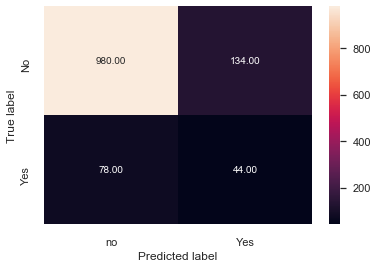

In [61]:
nb_cm = metrics.confusion_matrix( y_test,nb_clf.predict( X_test) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [62]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_clf.predict( X_test )))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1114
           1       0.26      0.42      0.32       122

    accuracy                           0.83      1236
   macro avg       0.60      0.64      0.61      1236
weighted avg       0.87      0.83      0.84      1236



In [63]:
accuracy=metrics.accuracy_score( y_test, nb_clf.predict( X_test ) )
AUC=metrics.roc_auc_score( y_test, nb_clf.predict( X_test ))

print("GaussianNB model accuracy: %.3f" % (accuracy))
print("GaussianNB model AUC: %.3f" % (AUC))

GaussianNB model accuracy: 0.828
GaussianNB model AUC: 0.620


In [64]:
from sklearn import naive_bayes
dir(naive_bayes)

['ABCMeta',
 'BaseDiscreteNB',
 'BaseEstimator',
 'BaseNB',
 'BernoulliNB',
 'CategoricalNB',
 'ClassifierMixin',
 'ComplementNB',
 'GaussianNB',
 'LabelBinarizer',
 'MultinomialNB',
 '_ALPHA_MIN',
 '_BaseDiscreteNB',
 '_BaseNB',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_partial_fit_first_call',
 '_check_sample_weight',
 'abstractmethod',
 'binarize',
 'check_X_y',
 'check_array',
 'check_is_fitted',
 'check_non_negative',
 'column_or_1d',
 'deprecated',
 'label_binarize',
 'logsumexp',
 'np',
 'safe_sparse_dot',
 'warnings']